In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

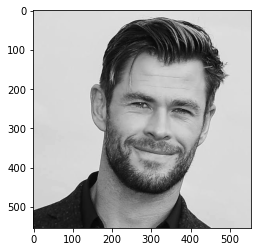

In [10]:
temp_image = cv2.imread('thor.jpg')
image = cv2.cvtColor(temp_image,cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')

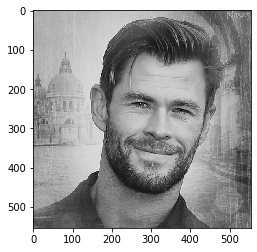

In [79]:
new_image = cv2.imread('Thor_backgroundjpg')
image_new = cv2.cvtColor(new_image,cv2.COLOR_BGR2GRAY)
plt.imshow(image_new,cmap='gray')

In [14]:
total_rows,total_cols = image.shape
print("Rows: ",total_rows)
print("Columns: ",total_cols)

Rows:  554
Columns:  554


In [15]:
LBP = np.zeros(image.shape,int)
#LBP_pad = np.pad(LBP, pad_width=1, mode='constant', constant_values=0)

In [16]:
neighbours = 3
for i in range (0,total_rows-neighbours):
    for j in range (0,total_cols - neighbours):
        row= i+neighbours
        col = j+neighbours
        patch = image[i:row,j:col]
        center_pixel = patch[1,1]
        #print(center_pixel)
        value = (patch >=center_pixel)
        value = value*1.0
        value1 = value.T.flatten()
        value1 = np.delete(value1,4)
        vector = np.where(value1)[0]
        if (len(vector))>=1:
            num = np.sum(2**vector)
        else:
            num = 0
        LBP[i+1,j+1] = num

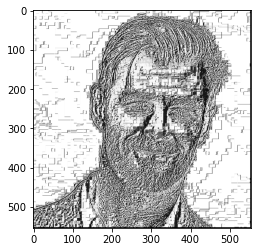

In [18]:
plt.imshow(LBP, cmap = 'gray')

In [12]:
#Reference: https://fairyonice.github.io/implement-lbp-from%20scratch.html

In [19]:
#image_new = cv2.resize(image_new,(554,554))
total_rows_new,total_cols_new = image_new.shape
print("Rows: ",total_rows_new)
print("Columns: ",total_cols_new)

Rows:  554
Columns:  554


In [20]:
LBP_new = np.zeros(image_new.shape,int)

In [23]:
neighbourss = 3
for i in range (0,total_rows_new-neighbours):
    for j in range (0,total_cols_new - neighbours):
        l= i+neighbourss
        b = j+neighbourss
        p = image_new[i:l,j:b]
        center = p[1,1]
        #print(center_pixel)
        value = (p>=center)
        value = value*1.0
        val = value.T.flatten()
        val = np.delete(val,4)
        vec = np.where(val)[0]
        if (len(vec))>=1:
            n = np.sum(2**vec)
        else:
            n = 0
        LBP_new[i+1,j+1] = n

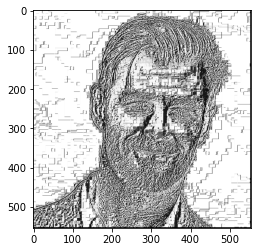

In [24]:
plt.imshow(LBP_new,cmap='gray')

In [50]:
neighbours = 14
arr=[]
one_image = []
second_image = []
count = 0
for i in range(0,LBP.shape[0]-1,14):
    #count+=1
    #print(count)
    for j in range(0,LBP.shape[1]-1,14):
        for k in range(0,LBP_new.shape[0]-1,14):
            for l in range(0,LBP_new.shape[1]-1,14):
                #print(LBP_new[k:k+14,l:l+14])
                #print(len(LBP[i:i+14,j:j+14]))
                if(np.array_equal(LBP[i:i+14,j:j+14],LBP_new[k:k+14,l:l+14])):
                    #print('hi')
                    arr.append([i,j,k,l])
                    one_image.append([i,j])
                    second_image.append([k,l])
    print(i)

0
14
28
42
56
70
84
98
112
126
140
154
168
182
196
210
224
238
252
266
280
294
308
322
336
350
364
378
392
406
420
434
448
462
476
490
504
518
532
546
